In [2]:
# load libaries
import psycopg2
import pandas as pd                # for dataframe
import numpy as np                   # for dealing with numpy
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
from sklearn.decomposition import PCA  # to apply PCA
from IPython.display import display
import sys
# a magic function that renders the figure in a notebook
%matplotlib Inline

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Define your database connection parameters
db_params = { "dbname": "IBM_MarketScan", "user": "faa_student", "password": "##########", "host": "pixel.ourcloud.ou.edu", "port": "5432" }

# Establish a connection to the database
try:
    connection = psycopg2.connect(**db_params)
    cursor = connection.cursor()
    print("Connected to the database")
except Exception as e:
    print(f"Error: {e}")
    
df = pd.read_sql_query(f"SELECT * FROM data_df", connection)

# Close the cursor and connection
cursor.close()
connection.close()

df.head()

Connected to the database


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VII,target_IX,target_X,target_XIX
0,2291314402,60,1,5,2,1,0,3,0,5,69,0,0,0,5,4,0,1,0,0,10,2,1,0,1,5,0,0,0,8,0,0,3,0,0,1,0,0
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,1,1
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1455831702,57,1,5,1,0,0,1,0,0,54,3,0,0,1,3,1,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,25068070301,48,1,4,0,0,2,2,0,3,90,10,0,0,3,6,0,0,0,0,11,4,0,0,0,2,0,0,0,4,0,0,0,0,0,1,0,0


In [4]:
df_IX = df[df['IX']==0]
df_IX.head()

,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VII,target_IX,target_X,target_XIX
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,1,1
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,2308096905,23,2,2,1,0,0,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0
9,25384664001,39,1,3,1,0,0,1,0,1,18,1,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0
10,2631532101,32,2,2,0,1,0,0,1,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0


In [7]:
# Set Input Variables and Target Variable
X = df_IX.drop(columns = ['enrolid', 'IX', 'XXII', 'target_VII', 'target_IX', 'target_X', 'target_XIX'], axis = 1)
y = df_IX['target_IX']

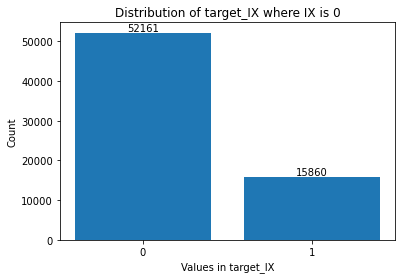

In [8]:
# Count the occurrences of 0 and 1 in target_IX
value_counts = y.value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0', '1'])
plt.xlabel('Values in target_IX')
plt.ylabel('Count')
plt.title('Distribution of target_IX where IX is 0')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [10]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

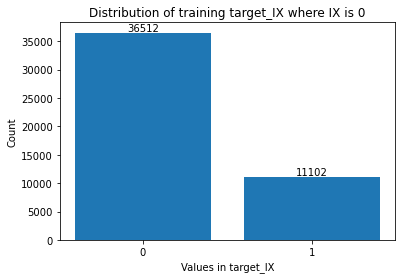

In [12]:
# Count the occurrences of 0 and 1 in target_IX
value_counts = y_train.value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0', '1'])
plt.xlabel('Values in target_IX')
plt.ylabel('Count')
plt.title('Distribution of training target_IX where IX is 0')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [13]:
# Assuming you have imbalanced classes, and you want to balance them
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled contain balanced data
print("X_train:", X_train.shape, "Y_train:", y_train.shape)
print("X_train_US:", X_train_us.shape, "Y_train_US:", y_train_us.shape)

X_train: (47614, 31) Y_train: (47614,)
X_train_US: (22204, 31) Y_train_US: (22204,)


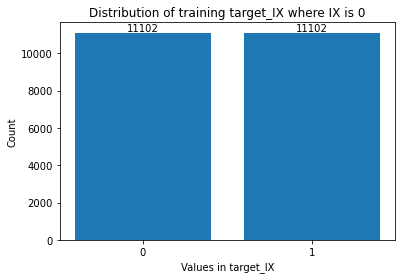

In [14]:
# Count the occurrences of 0 and 1 in target_IX
value_counts = y_train_us.value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0', '1'])
plt.xlabel('Values in target_IX')
plt.ylabel('Count')
plt.title('Distribution of training target_IX where IX is 0')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [15]:
pca = PCA(n_components=None)  # Setting n_components to None to get explained variance
pca.fit(X_train_us)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

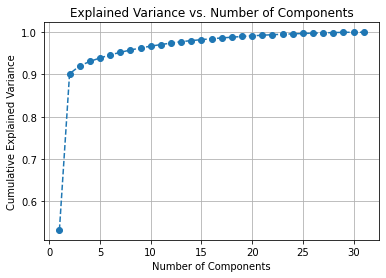

In [16]:
# Feature Selection
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [17]:
cumulative_explained_variance

array([0.53185098, 0.90166791, 0.9202632 , 0.93088726, 0.93909854,
       0.9462431 , 0.95246781, 0.95787597, 0.96281708, 0.96702736,
       0.97079968, 0.97434972, 0.97767399, 0.98018394, 0.98245959,
       0.9845786 , 0.98647933, 0.98827279, 0.98999427, 0.9914991 ,
       0.99293437, 0.9941759 , 0.99528855, 0.99617988, 0.9970336 ,
       0.99782367, 0.99851037, 0.99919569, 0.99980434, 1.        ,
       1.        ])

In [18]:
# taking 95% as threshold we are taking n_components=8
n_components=8
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_us)
X_test_pca = pca.fit_transform(X_test)

Calculating metrics with thresholds

In [19]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

Calculating metrics without thresholds

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, binary_predictions)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for max f1 threshold predictions')
    plt.show()
    
    # Calculate the Precision-Recall curve
    precision1, recall1, pr_thresholds1 = precision_recall_curve(y_test, binary_predictions)
    pr_auc1 = auc(recall1, precision1)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall1, precision1, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for max f1 threshold')
    plt.legend()
    plt.show()

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# Assume you have already split your PCA-transformed data into X_train_pca, X_test_pca, and y_train, y_test
# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train_pca, y_train_us)

LogisticRegression(random_state=42)

In [22]:
# Make probability predictions
y_probabilities = model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4003,8092,7557,755,12095,8312,0.592689,0.346280,0.841320,0.490624,0.679207,0.328330,0.517094,0.679207,0.305818
1,0.45,3771,9372,6277,987,13143,7264,0.644044,0.375299,0.792560,0.509388,0.695724,0.345812,0.598888,0.695724,0.331078
2,0.50,3556,10179,5470,1202,13735,6672,0.673053,0.393973,0.747373,0.515961,0.698915,0.353346,0.650457,0.698915,0.338700
3,0.55,3323,10840,4809,1435,14163,6244,0.694027,0.408633,0.698403,0.515593,0.695549,0.355709,0.692696,0.695549,0.337779
4,0.60,3049,11471,4178,1709,14520,5887,0.711521,0.421890,0.640815,0.508803,0.686917,0.354099,0.733018,0.686917,0.330519
5,0.65,2704,12151,3498,2054,14855,5552,0.727936,0.435988,0.568306,0.493431,0.672389,0.348427,0.776471,0.672389,0.316962
6,0.70,2250,12859,2790,2508,15109,5298,0.740383,0.446429,0.472888,0.459277,0.647301,0.334010,0.821714,0.647301,0.288856


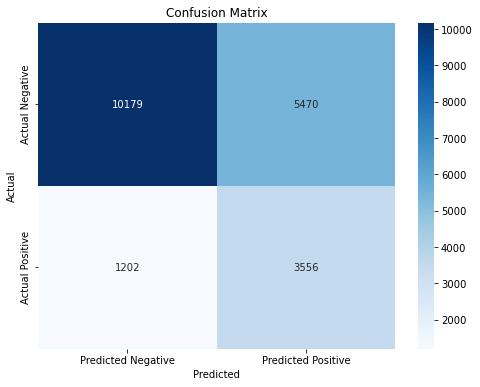

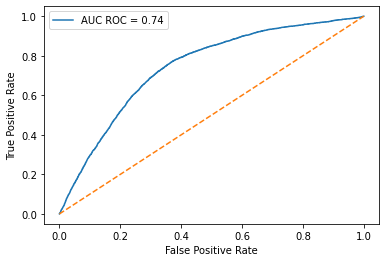

Accuracy: 0.6730533640417504
Precision: 0.39397296698426765
Recall: 0.7473728457335015
F1 Score: 0.5159605339524086
AUC-ROC: 0.7431110706766513
pr_auc 0.42143615321786937


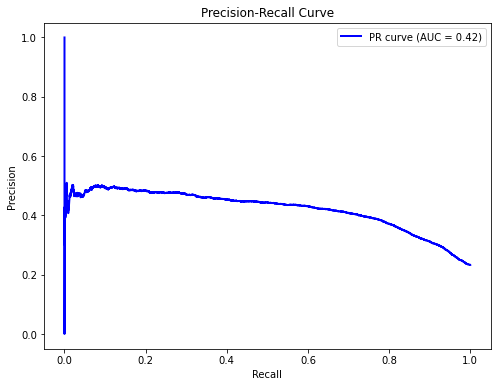

Max F1 Score: 0.5175795986117399
Threshold for Max F1 Score: 0.5278791263326008
ROC-AUC for Max F1 Threshold: 0.6985821875119782


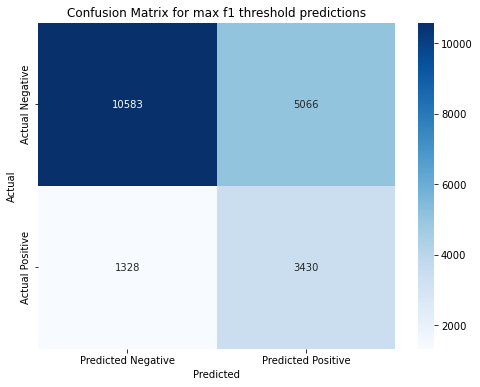

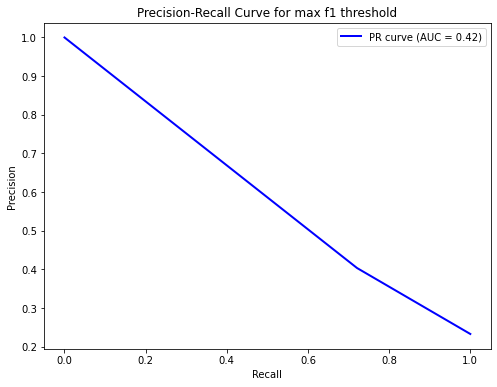

In [23]:
evaluate_classification_model(model, X_test_pca, y_test)

In [24]:
# Predict on the training set 
y_train_pred = model.predict (X_train_pca)

# Predict on the testing set
y_test_pred = model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: .2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.67


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Instantiate a logistic regression model
logreg = LogisticRegression(random_state=42)

# Define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logreg, hyperparameters, scoring='roc_auc', cv=5)
gridsearch.fit(X_train_pca, y_train_us)
best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Best Score: {gridsearch.best_score_}")

Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.745196017086242


In [26]:
# Train the model with the best hyperparameters on the full training set
logreg = LogisticRegression(**best_params,random_state=42)
logreg.fit(X_train_pca, y_train_us)

LogisticRegression(C=100, penalty='l1', random_state=42, solver='saga')

In [27]:
# Make probability predictions
y_probabilities = logreg.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4006,8064,7585,752,12070,8337,0.591464,0.345613,0.841950,0.490061,0.678627,0.327839,0.515304,0.678627,0.304956
1,0.45,3772,9347,6302,986,13119,7288,0.642868,0.374429,0.792770,0.508630,0.695030,0.345153,0.597291,0.695030,0.329893
2,0.50,3553,10170,5479,1205,13723,6684,0.672465,0.393379,0.746742,0.515301,0.698312,0.352801,0.649882,0.698312,0.337650
3,0.55,3323,10820,4829,1435,14143,6264,0.693047,0.407630,0.698403,0.514795,0.694910,0.355009,0.691418,0.694910,0.336536
4,0.60,3048,11462,4187,1710,14510,5897,0.711031,0.421285,0.640605,0.508297,0.686524,0.353672,0.732443,0.686524,0.329743
5,0.65,2696,12133,3516,2062,14829,5578,0.726662,0.433999,0.566625,0.491522,0.670973,0.346958,0.775321,0.670973,0.314217
6,0.70,2248,12840,2809,2510,15088,5319,0.739354,0.444532,0.472467,0.458074,0.646484,0.333024,0.820500,0.646484,0.286929


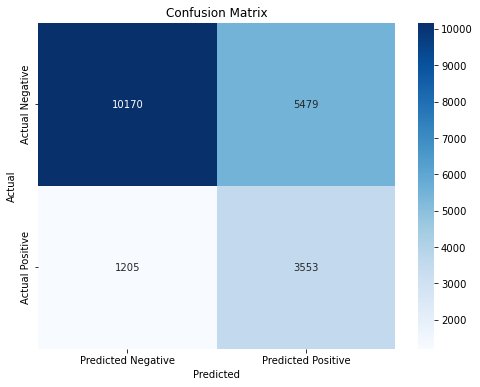

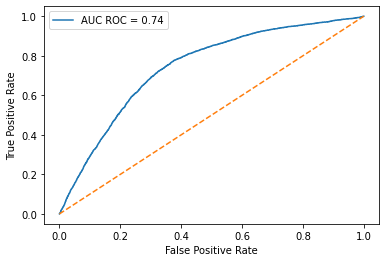

Accuracy: 0.6724653305238398
Precision: 0.3933790965456156
Recall: 0.7467423287095418
F1 Score: 0.5153009427121101
AUC-ROC: 0.7421183894660961
pr_auc 0.4198984453806701


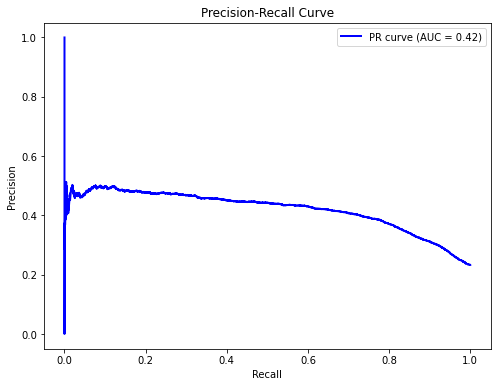

Max F1 Score: 0.5172439815862954
Threshold for Max F1 Score: 0.5293403500324978
ROC-AUC for Max F1 Threshold: 0.6982669289999985


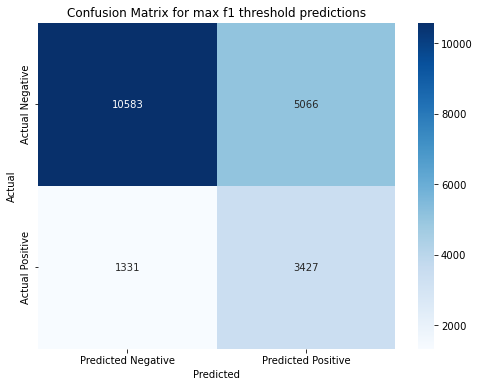

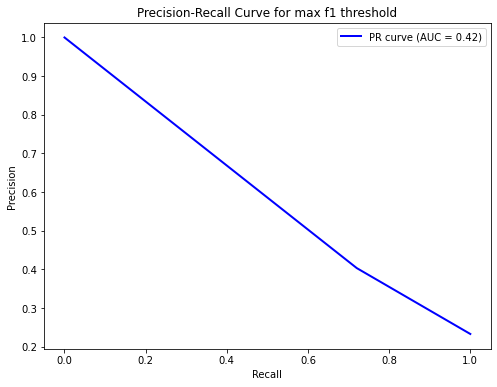

In [28]:
evaluate_classification_model(logreg, X_test_pca, y_test)

In [29]:
# Predict on the training set 
y_train_pred = logreg.predict(X_train_pca)

# Predict on the testing set
y_test_pred = logreg.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: .2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.67


# Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_pca, y_train_us)

GaussianNB()

In [31]:
# Make probability predictions
y_probabilities = gnb.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3882,8252,7397,876,12134,8273,0.594600,0.344179,0.815889,0.484130,0.671604,0.323739,0.527318,0.671604,0.291869
1,0.45,3754,8827,6822,1004,12581,7826,0.616504,0.354955,0.788987,0.489631,0.676524,0.329253,0.564062,0.676524,0.298765
2,0.50,3598,9478,6171,1160,13076,7331,0.640761,0.368308,0.756200,0.495353,0.680931,0.335358,0.605662,0.680931,0.306297
3,0.55,3375,10210,5439,1383,13585,6822,0.665703,0.382914,0.709332,0.497347,0.680885,0.339384,0.652438,0.680885,0.308818
4,0.60,3095,10866,4783,1663,13961,6446,0.684128,0.392866,0.650483,0.489870,0.672420,0.337045,0.694357,0.672420,0.299508
5,0.65,2825,11423,4226,1933,14248,6159,0.698192,0.400652,0.593737,0.478449,0.661844,0.332604,0.729951,0.661844,0.287818
6,0.70,2502,12048,3601,2256,14550,5857,0.712991,0.409962,0.525851,0.460731,0.647870,0.326129,0.769889,0.647870,0.273128


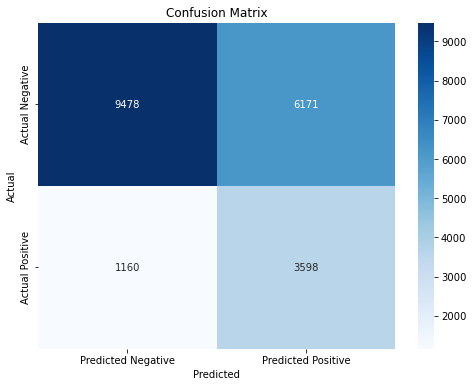

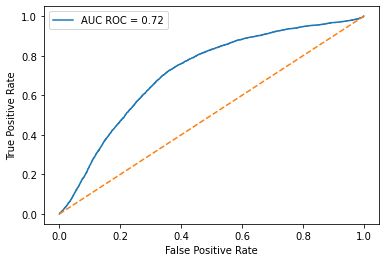

Accuracy: 0.6407605233498309
Precision: 0.36830791278534136
Recall: 0.7562000840689366
F1 Score: 0.49535347972740407
AUC-ROC: 0.7173767709024244
pr_auc 0.38038187970186865


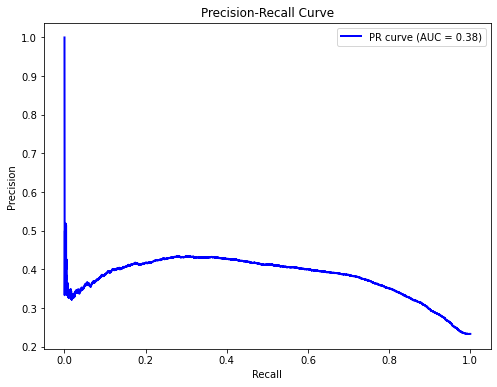

Max F1 Score: 0.4988075449880755
Threshold for Max F1 Score: 0.5377464736772511
ROC-AUC for Max F1 Threshold: 0.6828325781553296


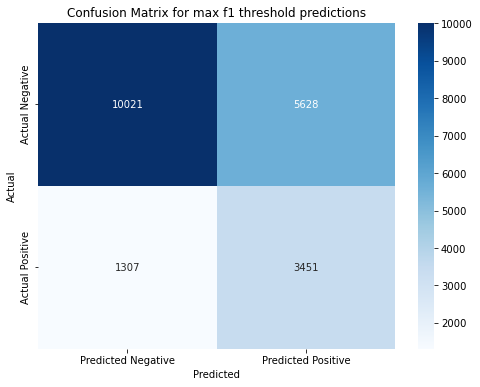

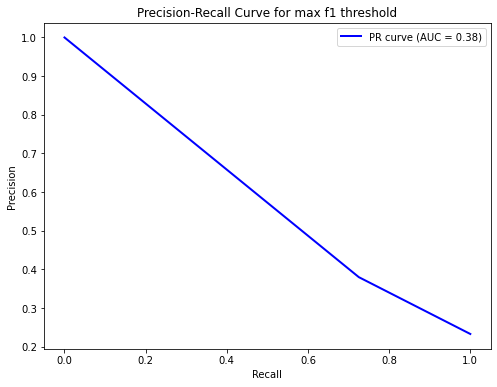

In [32]:
evaluate_classification_model(gnb, X_test_pca, y_test)

In [33]:
# Predict on the training set 
y_train_pred = gnb.predict (X_train_pca)

# Predict on the testing set
y_test_pred = gnb.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: .2f}')

Training Accuracy:  0.68
Testing Accuracy:  0.64


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train_us)

KNeighborsClassifier()

In [35]:
y_probabilities = knn_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4106,5796,9853,652,9902,10505,0.485226,0.294147,0.862968,0.438746,0.616671,0.285789,0.370375,0.616671,0.212232
1,0.45,3246,9504,6145,1512,12750,7657,0.624786,0.345650,0.682219,0.458831,0.644771,0.309901,0.607323,0.644771,0.245641
2,0.50,3246,9504,6145,1512,12750,7657,0.624786,0.345650,0.682219,0.458831,0.644771,0.309901,0.607323,0.644771,0.245641
3,0.55,3246,9504,6145,1512,12750,7657,0.624786,0.345650,0.682219,0.458831,0.644771,0.309901,0.607323,0.644771,0.245641
4,0.60,3246,9504,6145,1512,12750,7657,0.624786,0.345650,0.682219,0.458831,0.644771,0.309901,0.607323,0.644771,0.245641
5,0.65,2027,12499,3150,2731,14526,5881,0.711815,0.391540,0.426019,0.408052,0.612364,0.300630,0.798709,0.612364,0.218386
6,0.70,2027,12499,3150,2731,14526,5881,0.711815,0.391540,0.426019,0.408052,0.612364,0.300630,0.798709,0.612364,0.218386


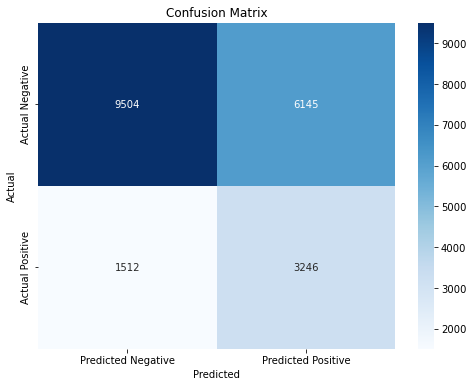

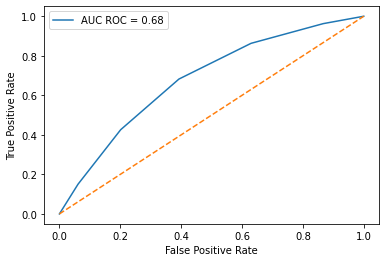

Accuracy: 0.6247856127799285
Precision: 0.34565009051219253
Recall: 0.682219419924338
F1 Score: 0.4588310127924235
AUC-ROC: 0.6813011498491323
pr_auc 0.4088556199086047


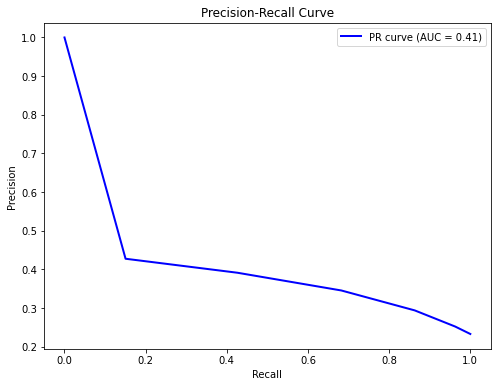

Max F1 Score: 0.4588310127924235
Threshold for Max F1 Score: 0.6
ROC-AUC for Max F1 Threshold: 0.6447712857817101


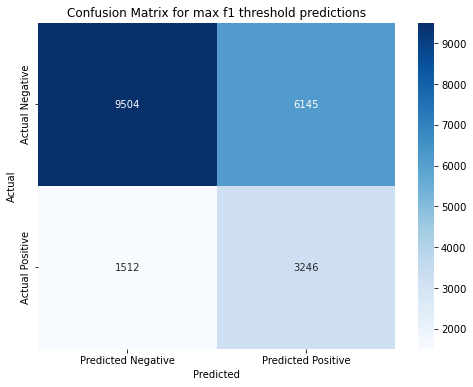

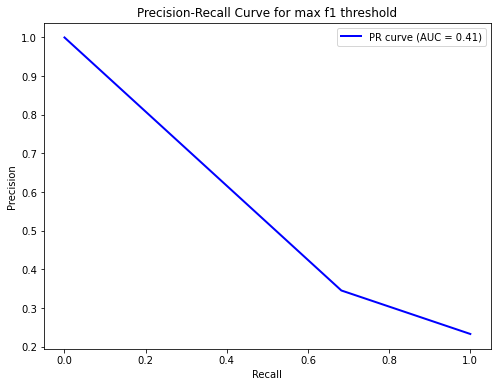

In [36]:
evaluate_classification_model(knn_model, X_test_pca, y_test)

In [37]:
# Predict on the training set
y_train_pred = knn_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = knn_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.76
Testing Accuracy: 0.62


In [38]:
from sklearn.model_selection import GridSearchCV
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}

# Create a Grid Search object with the KNN model and hyperparameters to tune
grid_search = GridSearchCV(knn_tune_model, hyperparameters, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train_pca, y_train_us)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validated score: {grid_search.best_score_}") 

Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 35, 'weights': 'uniform'}
Best cross-validated score: 0.6942438497944015


In [41]:
# Train the model with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, n_neighbors= 35, weights= 'uniform')
knn_best.fit(X_train_pca, y_train_us)

KNeighborsClassifier(leaf_size=20, n_neighbors=35)

In [42]:
# Make probability predictions
y_probabilities = knn_best.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4097,7689,7960,661,11786,8621,0.577547,0.339803,0.861076,0.487303,0.676209,0.324987,0.491341,0.676209,0.303075
1,0.45,3853,8887,6762,905,12740,7667,0.624296,0.362977,0.809794,0.501268,0.688845,0.338284,0.567896,0.688845,0.319665
2,0.50,3591,9931,5718,1167,13522,6885,0.662616,0.385756,0.754729,0.510557,0.694669,0.348327,0.634609,0.694669,0.330528
3,0.55,3242,10850,4799,1516,14092,6315,0.690547,0.403184,0.681379,0.506602,0.687357,0.349009,0.693335,0.687357,0.324254
4,0.60,3048,11289,4360,1710,14337,6070,0.702553,0.411447,0.640605,0.501069,0.680997,0.347370,0.721388,0.680997,0.318310
5,0.65,2573,12235,3414,2185,14808,5599,0.725633,0.429764,0.540773,0.478920,0.661306,0.339476,0.781839,0.661306,0.299605
6,0.70,1952,13198,2451,2806,15150,5257,0.742392,0.443334,0.410256,0.426154,0.626816,0.319382,0.843377,0.626816,0.260719


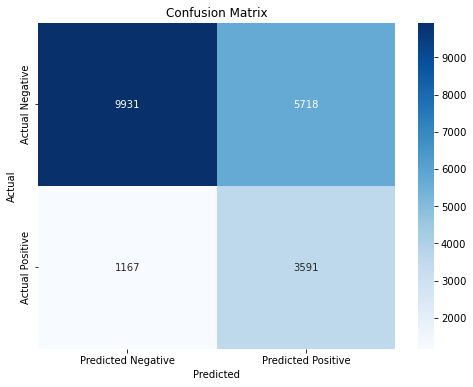

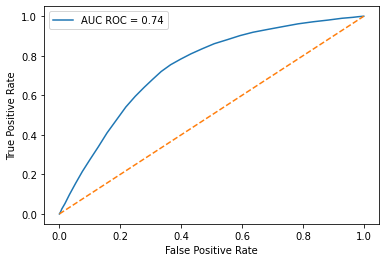

Accuracy: 0.6626157690988387
Precision: 0.38575572027070576
Recall: 0.7547288776796973
F1 Score: 0.510556621880998
AUC-ROC: 0.7405377656019554
pr_auc 0.41317732643294586


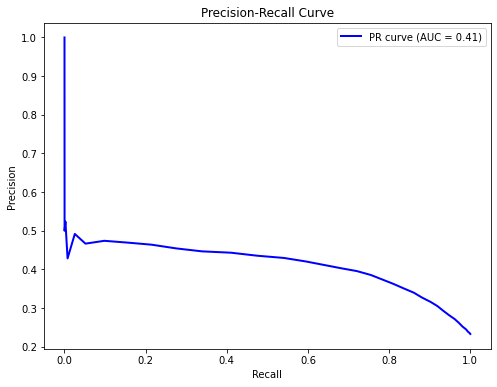

Max F1 Score: 0.5109173559877785
Threshold for Max F1 Score: 0.5428571428571428
ROC-AUC for Max F1 Threshold: 0.6930362109659169


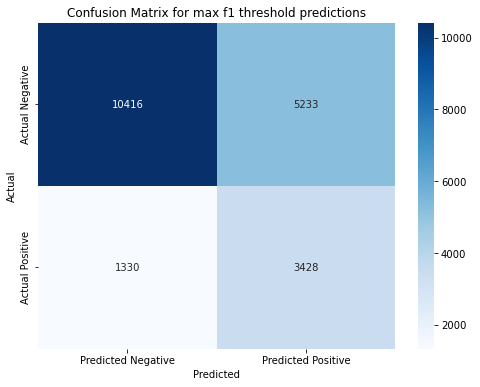

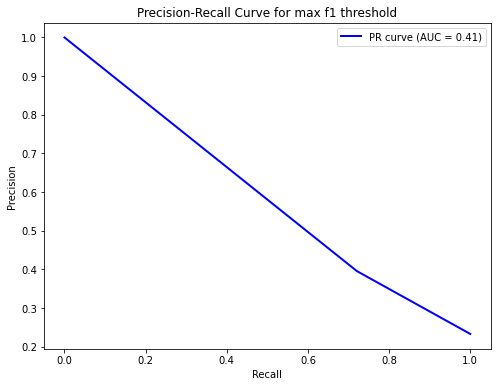

In [43]:
evaluate_classification_model(knn_best, X_test_pca, y_test)

In [44]:
# Predict on the training set
y_train_pred = knn_best.predict(X_train_pca)

# Predict on the testing set
y_test_pred = knn_best.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.70
Testing Accuracy: 0.66


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_model.fit(X_train_pca, y_train_us)

RandomForestClassifier(random_state=42)

In [46]:
# Make probability predictions
y_probabilities = rf_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4324,5219,10430,434,9543,10864,0.467634,0.293073,0.908785,0.443214,0.621144,0.287608,0.333504,0.621144,0.228926
1,0.45,3979,7039,8610,779,11018,9389,0.539913,0.316070,0.836276,0.458754,0.643040,0.302495,0.449805,0.643040,0.248829
2,0.50,3435,9038,6611,1323,12473,7934,0.611212,0.341927,0.721942,0.464064,0.649743,0.311682,0.577545,0.649743,0.253300
3,0.55,2685,11099,4550,2073,13784,6623,0.675455,0.371113,0.564313,0.447761,0.636780,0.311006,0.709247,0.636780,0.241803
4,0.60,1832,12770,2879,2926,14602,5805,0.715539,0.388877,0.385036,0.386947,0.600531,0.293114,0.816027,0.600531,0.201760
5,0.65,1099,14001,1648,3659,15100,5307,0.739942,0.400073,0.230979,0.292871,0.562835,0.271710,0.894690,0.562835,0.155690
6,0.70,553,14873,776,4205,15426,4981,0.755917,0.416102,0.116225,0.181699,0.533319,0.254418,0.950412,0.533319,0.114194


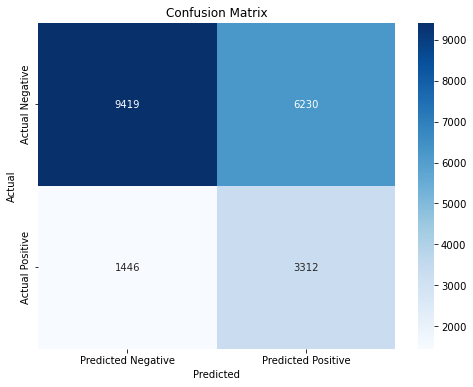

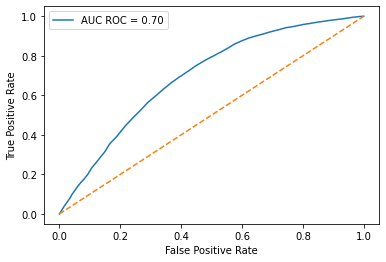

Accuracy: 0.6238545597099034
Precision: 0.34709704464472857
Recall: 0.6960907944514502
F1 Score: 0.46321678321678317
AUC-ROC: 0.6960156244984586
pr_auc 0.36467495852467763


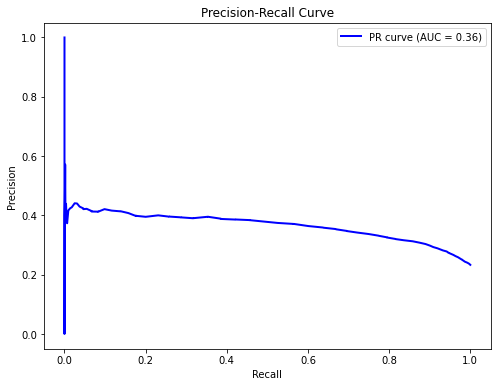

Max F1 Score: 0.465019234530873
Threshold for Max F1 Score: 0.49
ROC-AUC for Max F1 Threshold: 0.6506654588975881


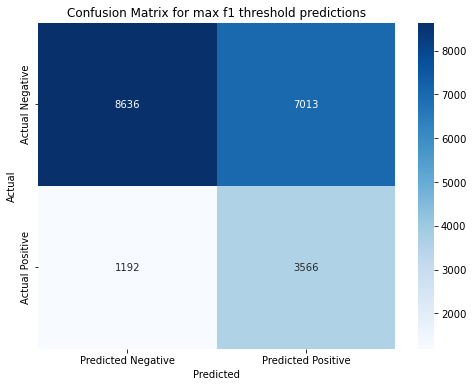

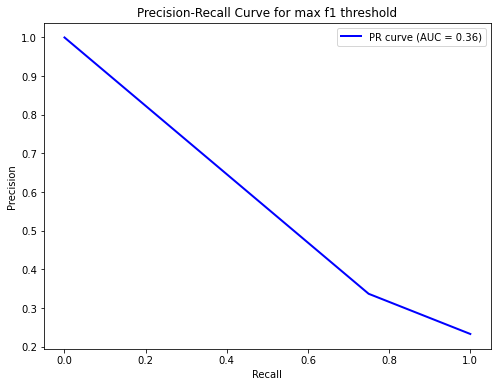

In [47]:
evaluate_classification_model(rf_model, X_test_pca, y_test)

In [48]:
# Predict on the training set
y_train_pred = rf_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = rf_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 0.62


In [49]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [None,10,20,30],
    'min_samples_leaf': [1,5,10],
    'n_estimators': [50,100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy']  
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

grid_search.fit(X_train_pca, y_train_us)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 200}
Best score: 0.753047031181037


In [50]:
best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, criterion= 'gini', max_depth= 10, max_features= 'sqrt', 
                                       min_samples_leaf= 10, n_estimators= 200)
best_rf_model.fit(X_train_pca, y_train_us)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [51]:
# Make probability predictions
y_probabilities = best_rf_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4296,6166,9483,462,10462,9945,0.512667,0.311779,0.902900,0.463505,0.648460,0.304144,0.394019,0.648460,0.268098
1,0.45,4064,7937,7712,694,12001,8406,0.588083,0.345109,0.854140,0.491593,0.680665,0.328779,0.507189,0.680665,0.309264
2,0.50,3769,9324,6325,989,13093,7314,0.641594,0.373390,0.792140,0.507541,0.693980,0.344241,0.595821,0.693980,0.328109
3,0.55,3413,10533,5116,1345,13946,6461,0.683393,0.400164,0.717318,0.513735,0.695198,0.352954,0.673078,0.695198,0.334688
4,0.60,2908,11704,3945,1850,14612,5795,0.716029,0.424340,0.611181,0.500904,0.679544,0.350004,0.747907,0.679544,0.321501
5,0.65,2221,12817,2832,2537,15038,5369,0.736904,0.439541,0.466793,0.452757,0.642911,0.329495,0.819030,0.642911,0.280006
6,0.70,1375,13929,1720,3383,15304,5103,0.749939,0.444265,0.288987,0.350185,0.589538,0.294163,0.890089,0.589538,0.211100


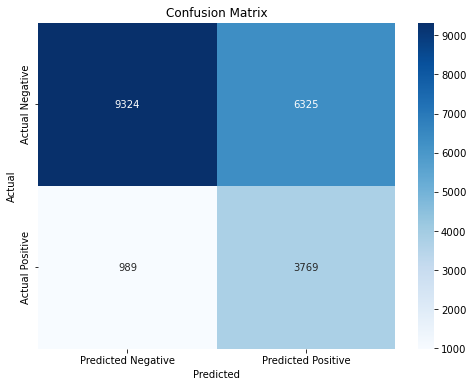

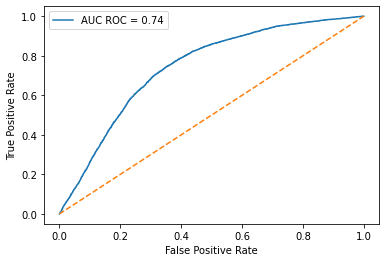

Accuracy: 0.6415935708335375
Precision: 0.37339013275212996
Recall: 0.7921395544346364
F1 Score: 0.507541071909507
AUC-ROC: 0.7416576595684045
pr_auc 0.40631312941411385


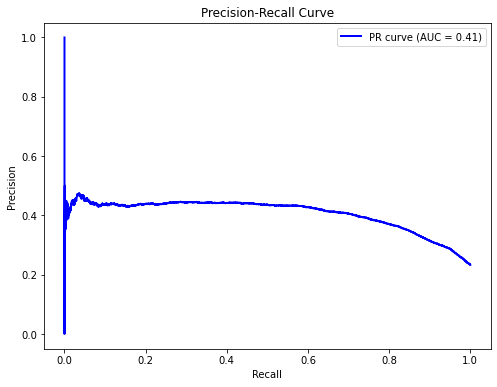

Max F1 Score: 0.5144300696624052
Threshold for Max F1 Score: 0.5574293019964389
ROC-AUC for Max F1 Threshold: 0.6950922172949663


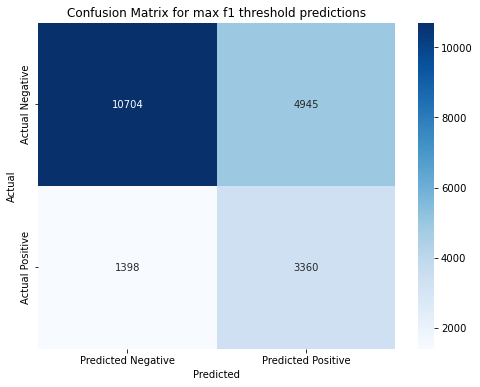

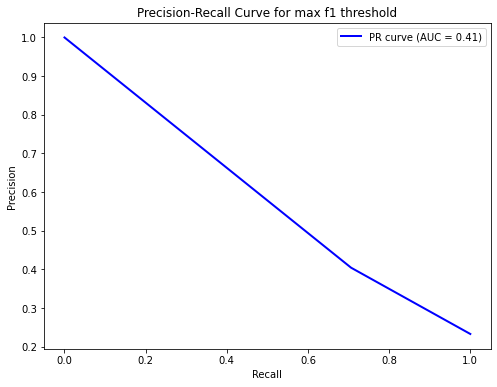

In [52]:
evaluate_classification_model(best_rf_model, X_test_pca, y_test)

In [54]:
# Predict on the training set
y_train_pred = best_rf_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.74
Testing Accuracy: 0.64


# SVM Classifier 

In [55]:
from sklearn.svm import SVC

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(random_state=42,probability=True, kernel='linear')

# Train the SVM model on the training data
svm_classifier.fit(X_train_pca, y_train_us)

SVC(kernel='linear', probability=True, random_state=42)

In [56]:
# Make probability predictions
y_probabilities = svm_classifier.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3908,8481,7168,850,12389,8018,0.607096,0.352835,0.821354,0.493621,0.681653,0.331455,0.541952,0.681653,0.308369
1,0.45,3692,9717,5932,1066,13409,6998,0.657078,0.383624,0.775956,0.513420,0.698445,0.349913,0.620934,0.698445,0.336185
2,0.50,3524,10312,5337,1234,13836,6571,0.678003,0.397698,0.740647,0.517512,0.699802,0.355023,0.658956,0.699802,0.340900
3,0.55,3270,11044,4605,1488,14314,6093,0.701426,0.415238,0.687264,0.517692,0.696498,0.358294,0.705732,0.696498,0.341356
4,0.60,3025,11569,4080,1733,14594,5813,0.715147,0.425757,0.635771,0.509989,0.687526,0.355606,0.739280,0.687526,0.332894
5,0.65,2747,12127,3522,2011,14874,5533,0.728868,0.438188,0.577343,0.498232,0.676141,0.351530,0.774938,0.676141,0.322888
6,0.70,2250,12913,2736,2508,15163,5244,0.743029,0.451264,0.472888,0.461823,0.649026,0.336296,0.825165,0.649026,0.293302


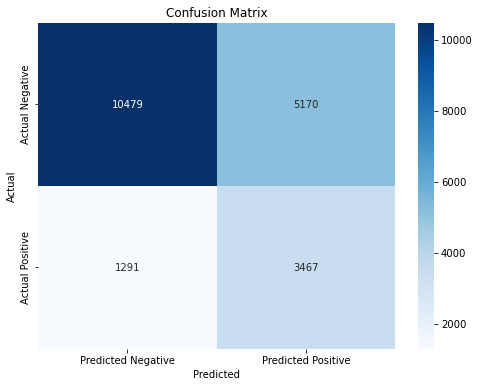

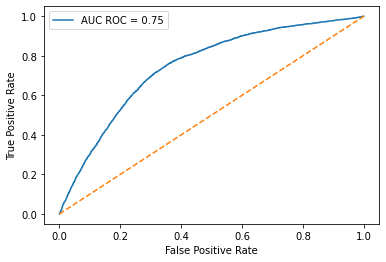

Accuracy: 0.6833929533983437
Precision: 0.40141252749797385
Recall: 0.7286675073560319
F1 Score: 0.5176558417319895
AUC-ROC: 0.745768517212039
pr_auc 0.430467409021462


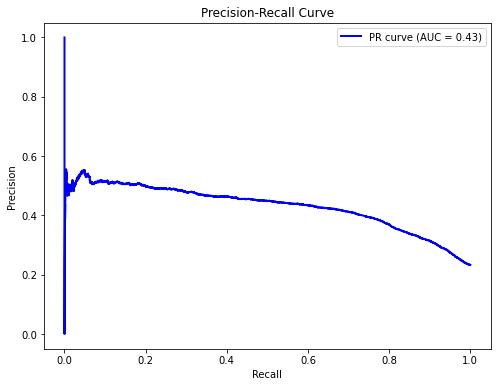

Max F1 Score: 0.5199908263894197
Threshold for Max F1 Score: 0.5245457517488795
ROC-AUC for Max F1 Threshold: 0.7001356215298028


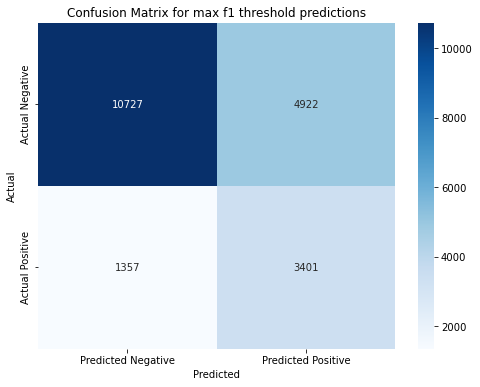

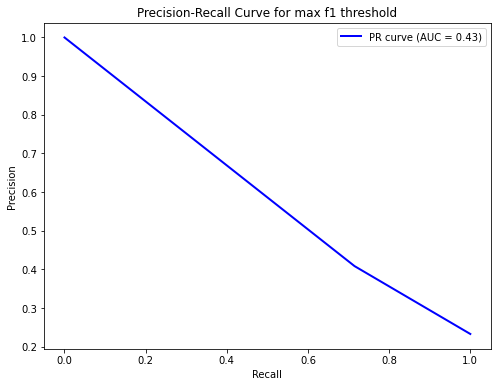

In [57]:
evaluate_classification_model(svm_classifier, X_test_pca, y_test)

In [58]:
# Predict on the training set
y_train_pred = svm_classifier.predict(X_train_pca)

# Predict on the testing set
y_test_pred = svm_classifier.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.69
Testing Accuracy: 0.68


In [59]:
from sklearn.model_selection import RandomizedSearchCV
svm_classifier = SVC(random_state=42,probability=True)

# Define the hyperparameters to search over
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                   'degree':[0,1,2,3,4]}

randomsearch = RandomizedSearchCV(svm_classifier, hyperparameters,cv=5,n_iter=2)
randomsearch.fit(X_train_pca, y_train_us)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 1, 'C': 1000}


In [60]:
best_svc_model = SVC(random_state=42,probability=True, **best_params)
best_svc_model.fit(X_train_pca, y_train_us)

SVC(C=1000, degree=1, gamma=0.1, probability=True, random_state=42)

In [61]:
# Make probability predictions
y_probabilities = best_svc_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3936,8366,7283,822,12302,8105,0.602832,0.350833,0.827238,0.492708,0.680921,0.330503,0.534603,0.680921,0.307529
1,0.45,3802,9170,6479,956,12972,7435,0.635664,0.369808,0.799075,0.505619,0.692528,0.342351,0.585980,0.692528,0.325643
2,0.50,3707,9652,5997,1051,13359,7048,0.654628,0.382007,0.779109,0.512654,0.697945,0.349127,0.616781,0.697945,0.335198
3,0.55,3553,10140,5509,1205,13693,6714,0.670995,0.392077,0.746742,0.514182,0.697354,0.351829,0.647965,0.697354,0.335905
4,0.60,3376,10688,4961,1382,14064,6343,0.689175,0.404942,0.709542,0.515617,0.696262,0.355045,0.682983,0.696262,0.337648
5,0.65,3138,11229,4420,1620,14367,6040,0.704023,0.415189,0.659521,0.509581,0.688537,0.353210,0.717554,0.688537,0.330175
6,0.70,2113,12561,3088,2645,14674,5733,0.719067,0.406268,0.444094,0.424340,0.623383,0.310034,0.802671,0.623383,0.239436


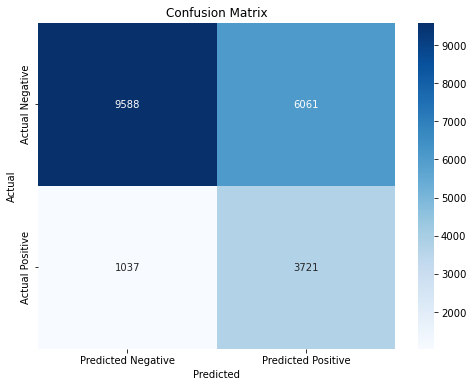

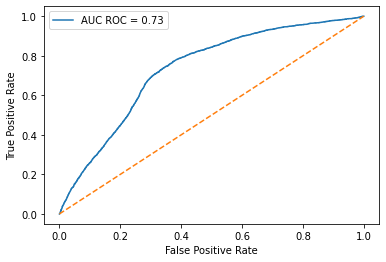

Accuracy: 0.6521781741559269
Precision: 0.3803925577591495
Recall: 0.782051282051282
F1 Score: 0.5118294360385144
AUC-ROC: 0.7319896378548846
pr_auc 0.4071869983776384


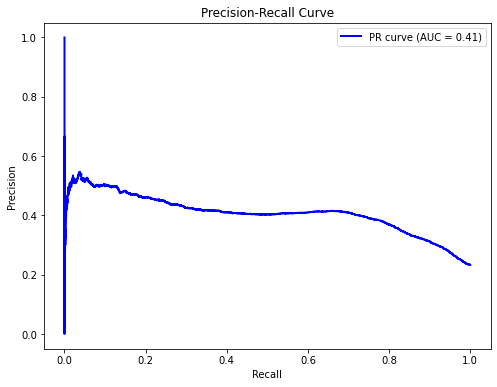

Max F1 Score: 0.517016209572098
Threshold for Max F1 Score: 0.6044537980718179
ROC-AUC for Max F1 Threshold: 0.697247145240732


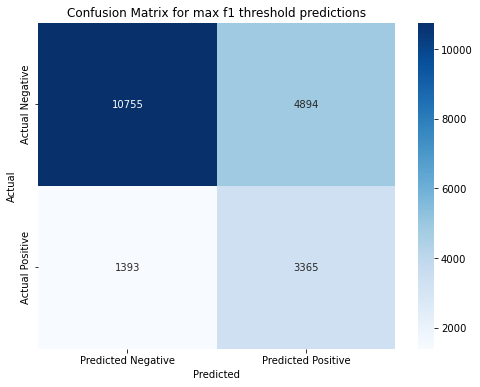

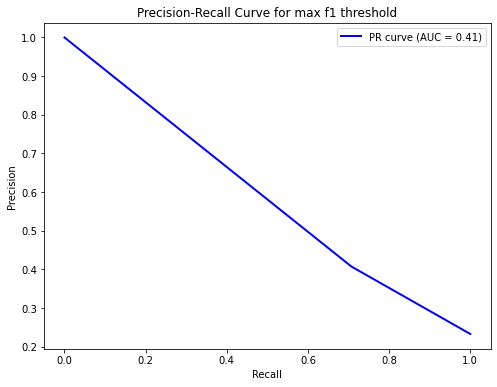

In [62]:
evaluate_classification_model(best_svc_model, X_test_pca, y_test)

In [63]:
# Predict on the training set
y_train_pred = best_svc_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = best_svc_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.70
Testing Accuracy: 0.65


## XGBOOST

In [64]:
import xgboost as xgb

# Create an XGBoost classifier with default hyperparameters
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train_pca, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [65]:
# Make probability predictions
y_probabilities = xgb_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3678,7414,8235,1080,11092,9315,0.543539,0.308738,0.773014,0.441245,0.623391,0.291582,0.473768,0.623391,0.211691
1,0.45,3443,8363,7286,1315,11806,8601,0.578527,0.320906,0.723623,0.444631,0.629017,0.296654,0.534411,0.629017,0.218505
2,0.50,3168,9333,6316,1590,12501,7906,0.612584,0.334036,0.665826,0.444881,0.631111,0.300324,0.596396,0.631111,0.222309
3,0.55,2835,10303,5346,1923,13138,7269,0.643799,0.346535,0.595839,0.438210,0.627110,0.300711,0.658381,0.627110,0.219340
4,0.60,2464,11273,4376,2294,13737,6670,0.673151,0.360234,0.517865,0.424901,0.619115,0.298965,0.720366,0.619115,0.213394
5,0.65,2094,12178,3471,2664,14272,6135,0.699368,0.376280,0.440101,0.405696,0.609149,0.296145,0.778197,0.609149,0.207265
6,0.70,1684,13011,2638,3074,14695,5712,0.720096,0.389634,0.353930,0.370925,0.592679,0.288538,0.831427,0.592679,0.191828


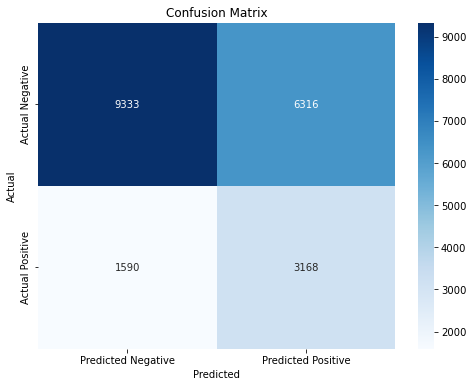

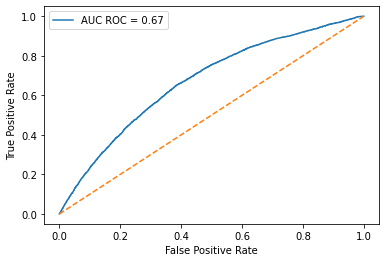

Accuracy: 0.6125839172832851
Precision: 0.33403627161535215
Recall: 0.6658259773013872
F1 Score: 0.4448813368908861
AUC-ROC: 0.6706065150175652
pr_auc 0.359031083434423


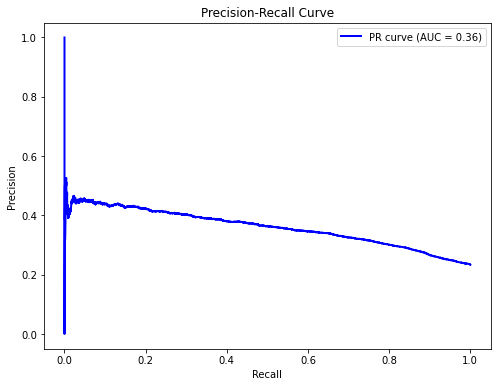

Max F1 Score: 0.44667485016968733
Threshold for Max F1 Score: 0.5143829
ROC-AUC for Max F1 Threshold: 0.633389887407847


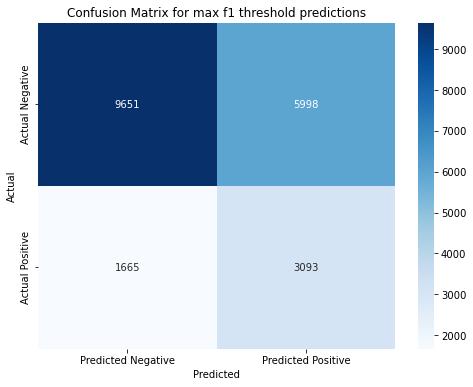

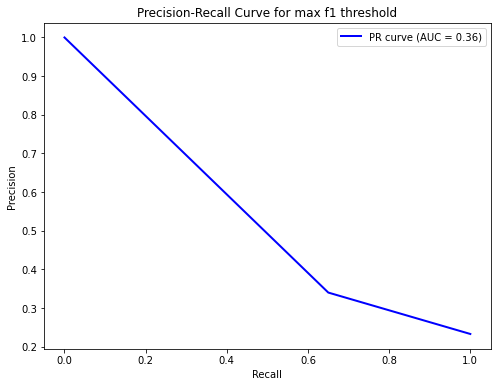

In [66]:
evaluate_classification_model(xgb_model, X_test_pca, y_test)

In [68]:
# Predict on the training set
y_train_pred = xgb_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = xgb_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.82
Testing Accuracy: 0.61


In [70]:
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, roc_auc_score

# Define the hyperparameter grid for the random search
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used in each boosting round
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight (Hessian) needed in a child
    'subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting the trees
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used for fitting the trees
}

# Define the scoring metric as AUC-ROC
scoring_metric = make_scorer(roc_auc_score, greater_is_better=True)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random parameter settings to try
    scoring=scoring_metric,  # Use the appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42  # Set a random seed for reproducibility
)

# Perform the random search on your training data
random_search.fit(X_train_pca, y_train_us)

best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'colsample_bytree': 0.7962072844310213, 'learning_rate': 0.02393512381599932, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 120, 'subsample': 0.7252496259847715}


In [71]:
# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train_pca, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7962072844310213, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02393512381599932,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
# Make probability predictions
y_probabilities = best_xgb_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4285,6319,9330,473,10604,9803,0.519626,0.314726,0.900588,0.466445,0.652192,0.306617,0.403796,0.652192,0.273130
1,0.45,4048,7974,7675,710,12022,8385,0.589112,0.345304,0.850778,0.491232,0.680165,0.328569,0.509553,0.680165,0.308161
2,0.50,3755,9233,6416,1003,12988,7419,0.636448,0.369187,0.789197,0.503048,0.689601,0.340511,0.590006,0.689601,0.320686
3,0.55,3381,10472,5177,1377,13853,6554,0.678836,0.395069,0.710593,0.507810,0.689886,0.348210,0.669180,0.689886,0.325426
4,0.60,2776,11808,3841,1982,14584,5823,0.714657,0.419525,0.583438,0.488088,0.668996,0.341891,0.754553,0.668996,0.305315
5,0.65,2154,12808,2841,2604,14962,5445,0.733180,0.431231,0.452711,0.441710,0.635583,0.322826,0.818455,0.635583,0.266682
6,0.70,1336,13996,1653,3422,15332,5075,0.751311,0.446972,0.280790,0.344908,0.587580,0.293193,0.894370,0.587580,0.209474


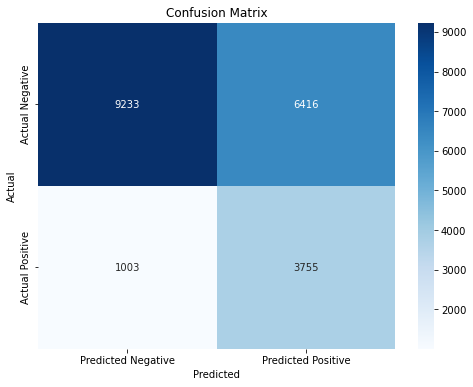

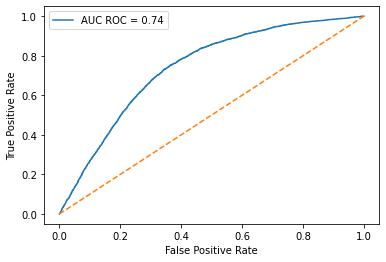

Accuracy: 0.6364482775518204
Precision: 0.36918690394258186
Recall: 0.7891971416561581
F1 Score: 0.5030477593944671
AUC-ROC: 0.7387958426248203
pr_auc 0.40612511629033443


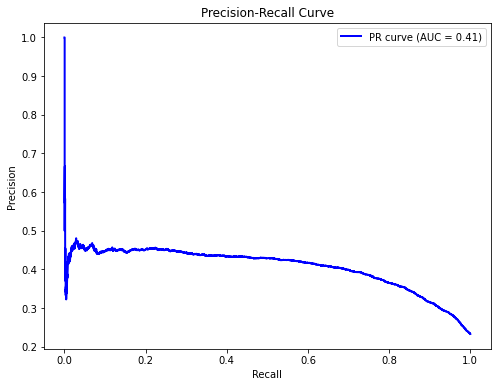

Max F1 Score: 0.510797708241516
Threshold for Max F1 Score: 0.5396764
ROC-AUC for Max F1 Threshold: 0.6935205985145279


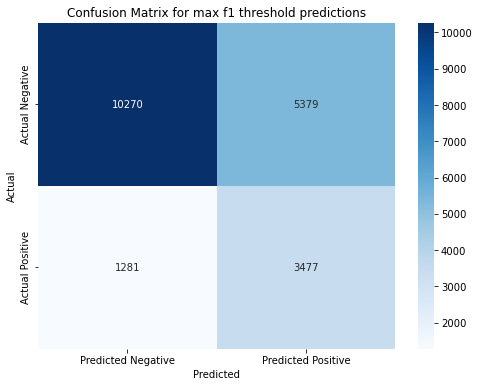

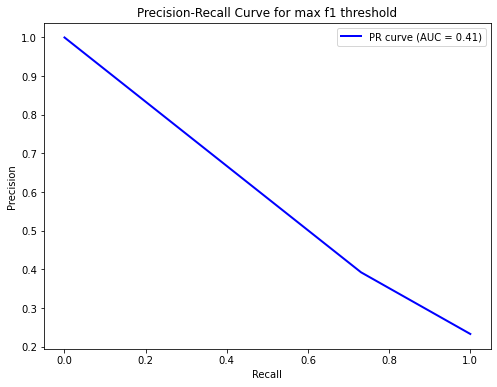

In [73]:
evaluate_classification_model(best_xgb_model, X_test_pca, y_test)

In [74]:
# Predict on the training set
y_train_pred = best_xgb_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = best_xgb_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.71
Testing Accuracy: 0.64


# Gradient Boosting 

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_pca, y_train_us)

GradientBoostingClassifier()

In [76]:
# Make probability predictions
y_probabilities = gb_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4036,7258,8391,722,11294,9113,0.553438,0.324777,0.848256,0.469712,0.656028,0.310874,0.463800,0.656028,0.270397
1,0.45,3770,8643,7006,988,12413,7994,0.608272,0.349852,0.792350,0.485387,0.672327,0.325620,0.552304,0.672327,0.291927
2,0.50,3520,9611,6038,1238,13131,7276,0.643456,0.368278,0.739807,0.491757,0.676984,0.333120,0.614161,0.676984,0.299944
3,0.55,3201,10650,4999,1557,13851,6556,0.678738,0.390366,0.672762,0.494058,0.676658,0.338921,0.680555,0.676658,0.304725
4,0.60,2902,11470,4179,1856,14372,6035,0.704268,0.409829,0.609920,0.490244,0.671437,0.340912,0.732954,0.671437,0.304574
5,0.65,2493,12327,3322,2265,14820,5587,0.726221,0.428719,0.523960,0.471579,0.655839,0.335623,0.787718,0.655839,0.291964
6,0.70,1926,13186,2463,2832,15112,5295,0.740530,0.438824,0.404792,0.421122,0.623701,0.316408,0.842610,0.623701,0.254608


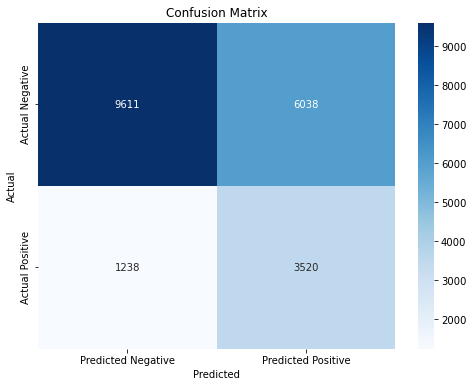

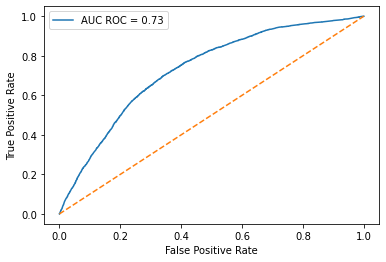

Accuracy: 0.6434556769735875
Precision: 0.3682778824021762
Recall: 0.7398066414459857
F1 Score: 0.4917574741547918
AUC-ROC: 0.7296493099419804
pr_auc 0.41310362805692014


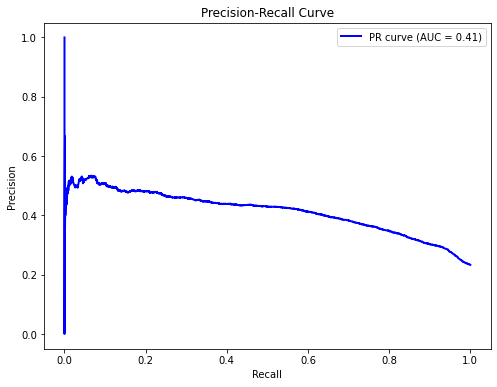

Max F1 Score: 0.4955620198403818
Threshold for Max F1 Score: 0.5329040864873075
ROC-AUC for Max F1 Threshold: 0.6788936900780846


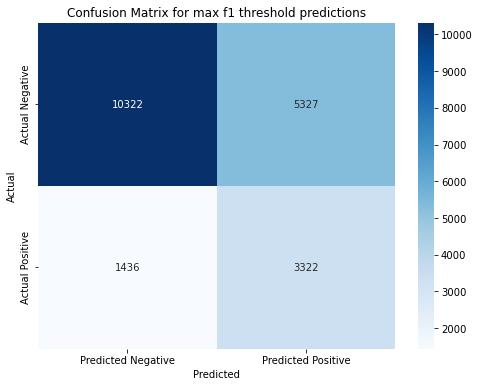

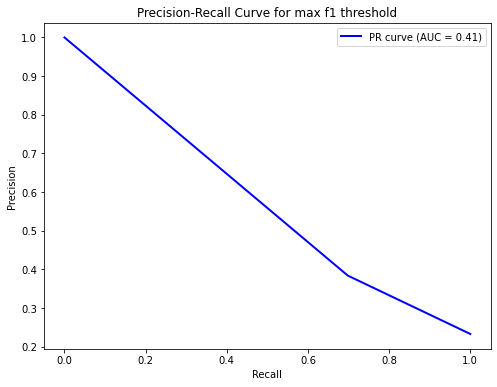

In [77]:
evaluate_classification_model(gb_model, X_test_pca, y_test)

In [78]:
# Predict on the training set
y_train_pred = gb_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = gb_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.71
Testing Accuracy: 0.64


In [79]:
from sklearn.model_selection import RandomizedSearchCV

gb_model = GradientBoostingClassifier()

# Define a parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
random_search.fit(X_train_pca, y_train_us)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}


In [80]:
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_pca, y_train_us)

GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                           subsample=0.8)

In [81]:
# Make probability predictions
y_probabilities = best_gb_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4062,7267,8382,696,11329,9078,0.555153,0.326422,0.853720,0.472271,0.659047,0.312779,0.464375,0.659047,0.275736
1,0.45,3789,8525,7124,969,12314,8093,0.603420,0.347201,0.796343,0.483568,0.670553,0.323974,0.544763,0.670553,0.289167
2,0.50,3483,9667,5982,1275,13150,7257,0.644387,0.367987,0.732030,0.489770,0.674885,0.331856,0.617739,0.674885,0.296571
3,0.55,3115,10738,4911,1643,13853,6554,0.678836,0.388114,0.654687,0.487328,0.670432,0.334604,0.686178,0.670432,0.295060
4,0.60,2623,11876,3773,2135,14499,5908,0.710491,0.410100,0.551282,0.470325,0.655090,0.330702,0.758898,0.655090,0.282736
5,0.65,2102,12857,2792,2656,14959,5448,0.733033,0.429506,0.441782,0.435557,0.631684,0.319899,0.821586,0.631684,0.260819
6,0.70,1512,13726,1923,3246,15238,5169,0.746705,0.440175,0.317781,0.369096,0.597449,0.298942,0.877117,0.597449,0.220258


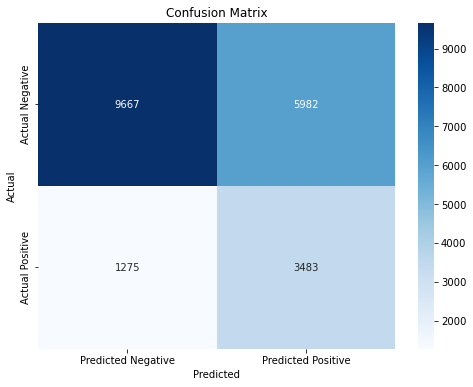

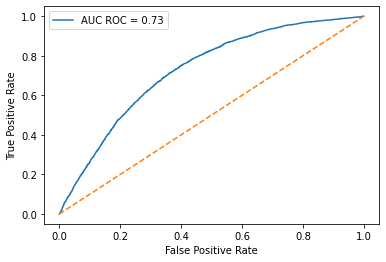

Accuracy: 0.6443867300436125
Precision: 0.36798732171156895
Recall: 0.7320302648171501
F1 Score: 0.489770090698165
AUC-ROC: 0.7266562041158752
pr_auc 0.40205566466150594


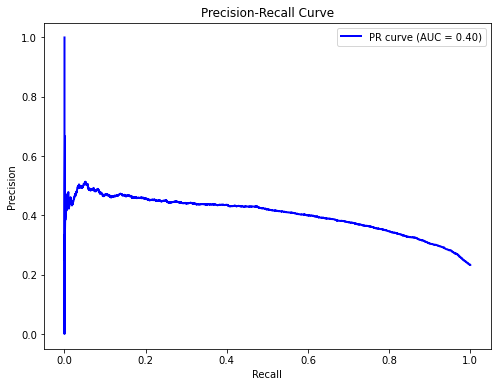

Max F1 Score: 0.4910630291627469
Threshold for Max F1 Score: 0.5162005632971648
ROC-AUC for Max F1 Threshold: 0.6754595433217856


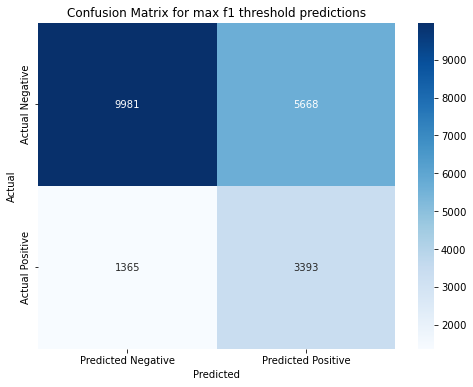

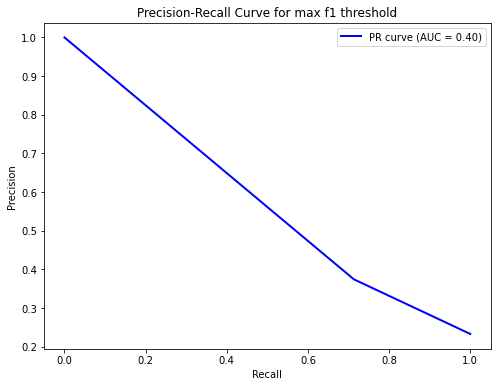

In [82]:
evaluate_classification_model(best_gb_model, X_test_pca, y_test)

In [83]:
# Predict on the training set
y_train_pred = best_gb_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = best_gb_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.71
Testing Accuracy: 0.64


# MLP

In [84]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, random_state=42)
mlp.fit(X_train_pca, y_train_us)

MLPClassifier(max_iter=500, random_state=42)

In [85]:
# Make probability predictions
y_probabilities = mlp.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3964,7625,8024,794,11589,8818,0.567893,0.330664,0.833123,0.473426,0.660187,0.314392,0.487252,0.660187,0.275176
1,0.45,3794,8508,7141,964,12302,8105,0.602832,0.346959,0.797394,0.483528,0.670535,0.323902,0.543677,0.670535,0.289181
2,0.50,3583,9337,6312,1175,12920,7487,0.633116,0.362102,0.753047,0.489047,0.674850,0.330258,0.596652,0.674850,0.295869
3,0.55,3311,10217,5432,1447,13528,6879,0.662910,0.378703,0.695881,0.490482,0.674383,0.334439,0.652885,0.674383,0.298013
4,0.60,2989,11117,4532,1769,14106,6301,0.691233,0.397421,0.628205,0.486847,0.669301,0.336348,0.710397,0.669301,0.296789
5,0.65,2562,11969,3680,2196,14531,5876,0.712060,0.410445,0.538462,0.465818,0.651651,0.328619,0.764841,0.651651,0.278331
6,0.70,2094,12810,2839,2664,14904,5503,0.730338,0.424488,0.440101,0.432154,0.629342,0.317361,0.818583,0.629342,0.255486


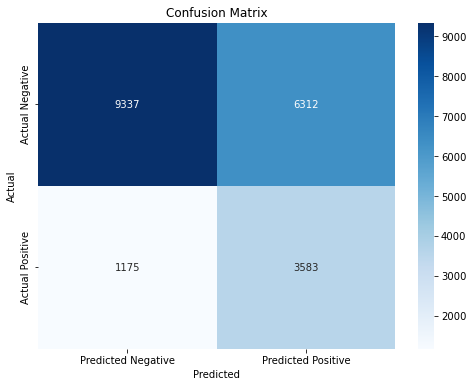

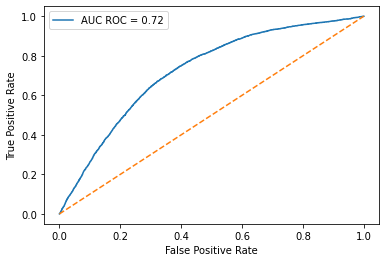

Accuracy: 0.6331160876169941
Precision: 0.3621020717534108
Recall: 0.7530474989491382
F1 Score: 0.4890466116153689
AUC-ROC: 0.7228382970885765
pr_auc 0.39604692817792975


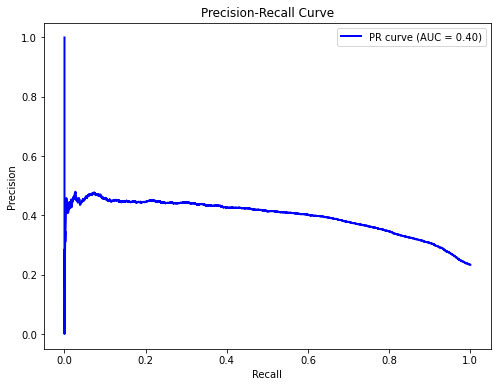

Max F1 Score: 0.4916850625459896
Threshold for Max F1 Score: 0.5462958671047785
ROC-AUC for Max F1 Threshold: 0.675650375886027


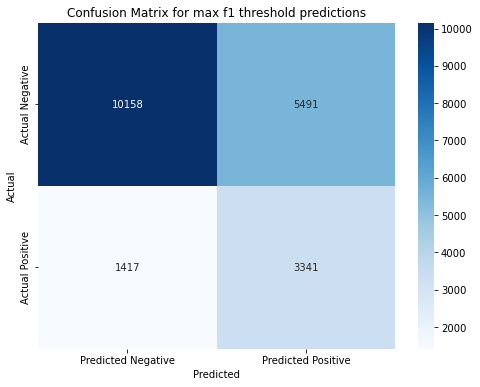

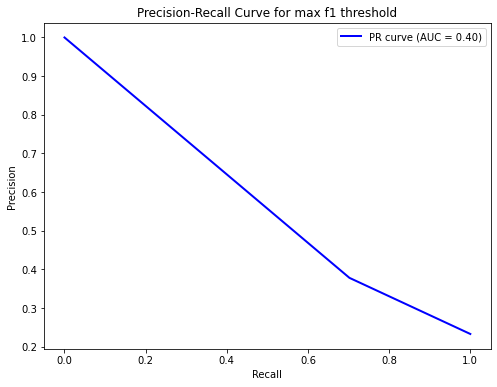

In [86]:
evaluate_classification_model(mlp, X_test_pca, y_test)

In [87]:
# Predict on the training set
y_train_pred = mlp.predict(X_train_pca)

# Predict on the testing set
y_test_pred = mlp.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.70
Testing Accuracy: 0.63


In [89]:
# Define a dictionary of hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a RandomSearchCV object
random_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')
random_search.fit(X_train_pca, y_train_us)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'relu'}


In [90]:
best_mlp_model = MLPClassifier(max_iter=500, random_state=42, **best_params)
best_mlp_model.fit(X_train_pca, y_train_us)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01,
              max_iter=500, random_state=42)

In [91]:
# Make probability predictions
y_probabilities = best_mlp_model.predict_proba(X_test_pca)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3993,8155,7494,765,12148,8259,0.595286,0.347610,0.839218,0.491597,0.680169,0.329208,0.521120,0.680169,0.307170
1,0.45,3814,9062,6587,944,12876,7531,0.630960,0.366696,0.801597,0.503199,0.690338,0.340201,0.579079,0.690338,0.321990
2,0.50,3587,9847,5802,1171,13434,6973,0.658304,0.382043,0.753888,0.507104,0.691565,0.345400,0.629241,0.691565,0.325043
3,0.55,3350,10662,4987,1408,14012,6395,0.686627,0.401823,0.704077,0.511646,0.692699,0.351911,0.681321,0.692699,0.331518
4,0.60,2936,11663,3986,1822,14599,5808,0.715392,0.424155,0.617066,0.502740,0.681177,0.351015,0.745287,0.681177,0.323628
5,0.65,2380,12592,3057,2378,14972,5435,0.733670,0.437741,0.500210,0.466896,0.652431,0.335491,0.804652,0.652431,0.291587
6,0.70,1728,13646,2003,3030,15374,5033,0.753369,0.463147,0.363178,0.407115,0.617591,0.316683,0.872005,0.617591,0.257277


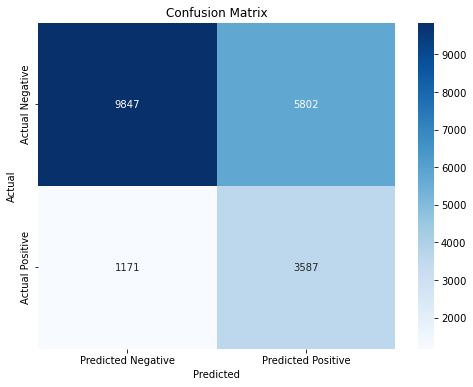

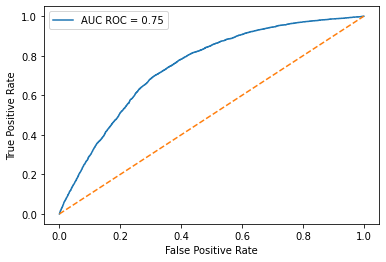

Accuracy: 0.6583035233008282
Precision: 0.3820428160613484
Recall: 0.7538881883144178
F1 Score: 0.507103979642327
AUC-ROC: 0.7461215890173274
pr_auc 0.4278020926187178


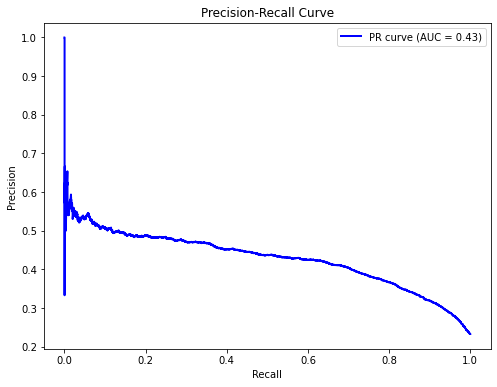

Max F1 Score: 0.5128482135967282
Threshold for Max F1 Score: 0.5552357473558254
ROC-AUC for Max F1 Threshold: 0.6933447408471215


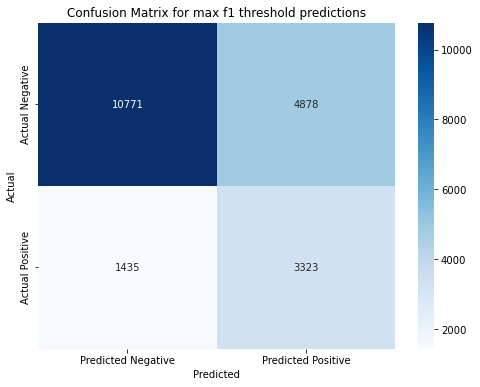

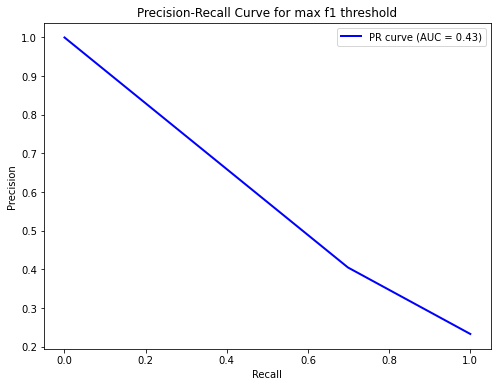

In [92]:
evaluate_classification_model(best_mlp_model, X_test_pca, y_test)

In [94]:
# Predict on the training set
y_train_pred = best_mlp_model.predict(X_train_pca)

# Predict on the testing set
y_test_pred = best_mlp_model.predict(X_test_pca)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_us, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.70
Testing Accuracy: 0.66
